# ACIC 2017 Midterm: INaturalist SDM

## Description TODO REMAKE
Working with clients Katie Prudic and Jeff Oliver, we were tasked with using the Species Distribution Model (SDM) to create distribution maps for over 700 species of North American butterflies using iNaturalist data.The data for each species was split into 13 sets: one for each month and one with all the data retrieved for a species. The general purpose of this project is to extract and clean the data from iNaturalist, run it through the SDM and make it reproducible for other researchers.

The purpose of this notebook is to display the results of the above. Given one or more species scientifc names, this notebook will display the produced distribution maps

Code and documentation can be found on github at:
https://github.com/Dtruong77/ua-acic-2017-midterm


## Setup
Below is the absolute path for the project directory. Change to suit your system.

In [32]:
project_path = "/xdisk/alexanderfarmer/ua-acic-2017-midterm/"
stacked_path = "/xdisk/jamesthornton/ebutterfly_sdm/"

Import necessary python packages

In [33]:
from IPython.display import Image, display, Markdown
import pandas as pd

Get list of available taxon ids and map them to their scientific name

In [34]:
species_file_path = project_path + "data/gbif/taxon-ids.txt"

name_taxId_map = {}

species = pd.read_csv(species_file_path, sep="\t")
for index, row in species.iterrows():
    name_taxId_map[row.scientificName] = str(row.taxonID)
    
month_map = {"00" : "All observations",
             "01" : "January",
             "02" : "February",
             "03" : "March",
             "04" : "April",
             "05" : "May",
             "06" : "June",
             "07" : "July",
             "08" : "August",
             "09" : "September",
             "10" : "October",
             "12" : "November",
             "12" : "December",
            }

## Display Maps

List of butterfly scientific names to get maps for. Insert names below to change what is displayed. Run this cell and the cell below to display results.

In [35]:
species_name_list = ["hesperia comma",
                     "battus polydamas",
                    ]

In [36]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [37]:
valid_input=False
while not valid_input:
    butterfly = str(input("Input species name to map: ")).lower()
    algorithm = str(input("Input algorithm to run: ")).lower()
    
    if butterfly.lower() in species_name_list:
        if algorithm == "cta":
            pass #run CTA
            valid_input = True
        elif algorithm == "glm":
            pass #run GLM
            valid_input = True
        elif algorithm == "rf":
            pass #run RF
            valid_input = True
        else:
            print("Invalid algorithm selected")
    else:
        print("Species not found or entered incorrectly")

Input species name to map: hesperia comma
Input algorithm to run: k
Invalid algorithm selected
Input species name to map: hesperia comma
Input algorithm to run: cta
Invalid algorithm selected


KeyboardInterrupt: 

Run the below cell (AFTER running the cell above) to see results.

# Hesperia comma
## Taxon ID: 58468

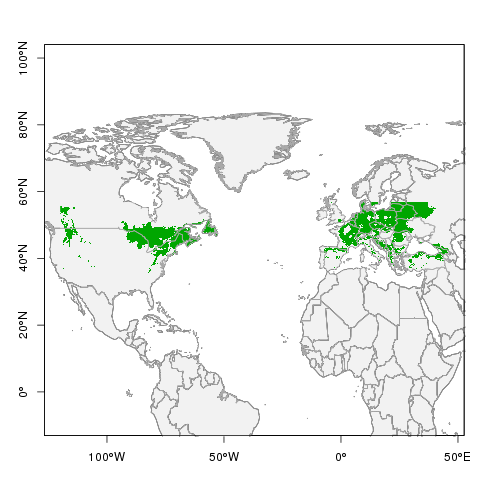

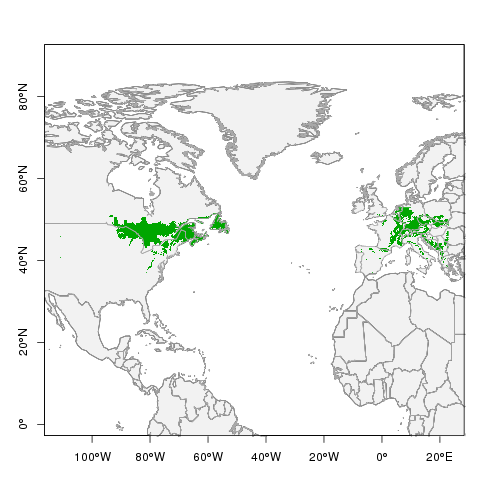

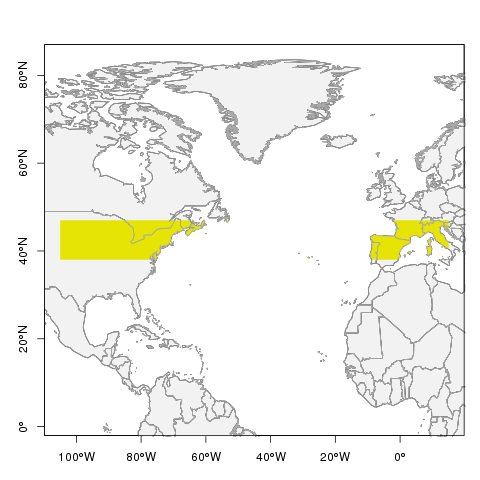

# Battus polydamas
## Taxon ID: 68275

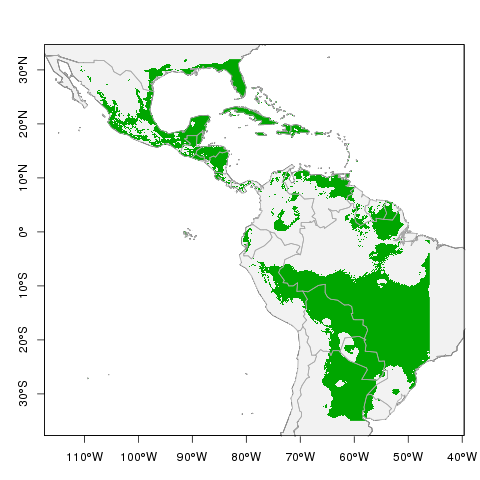

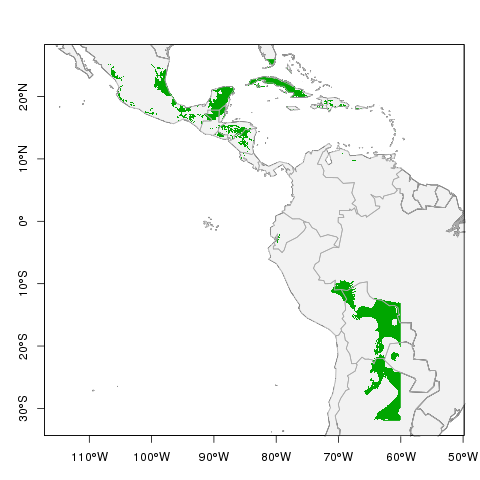

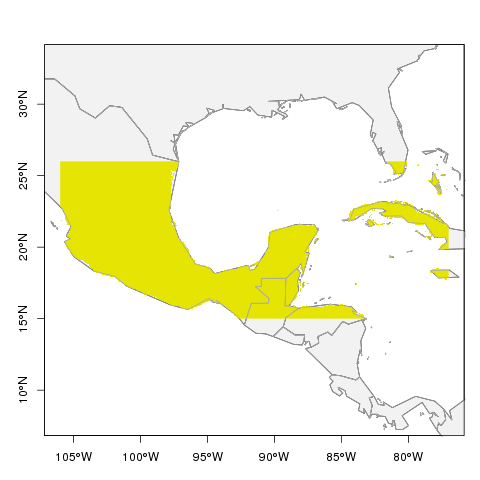

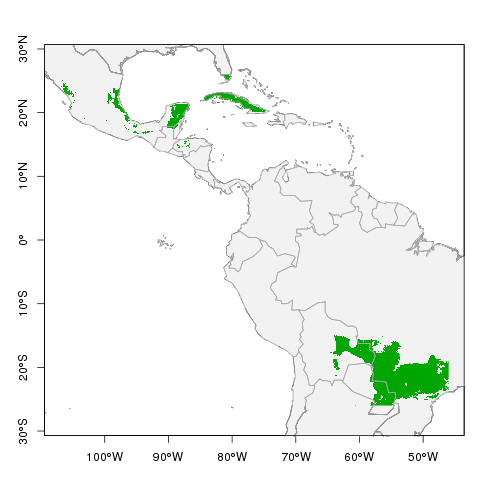

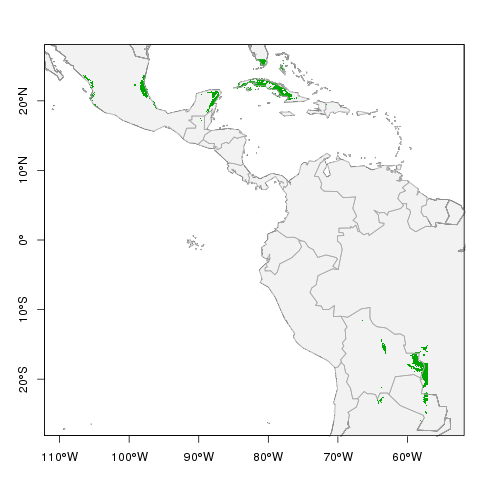

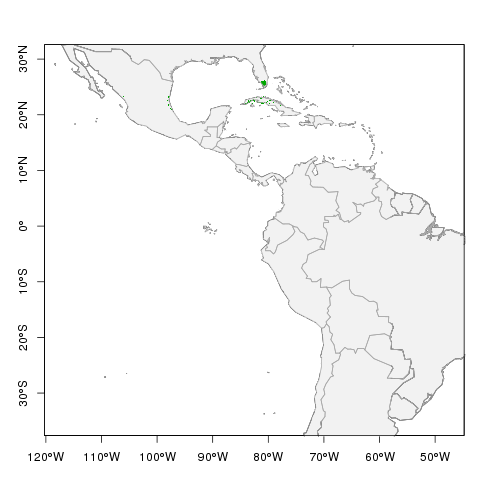

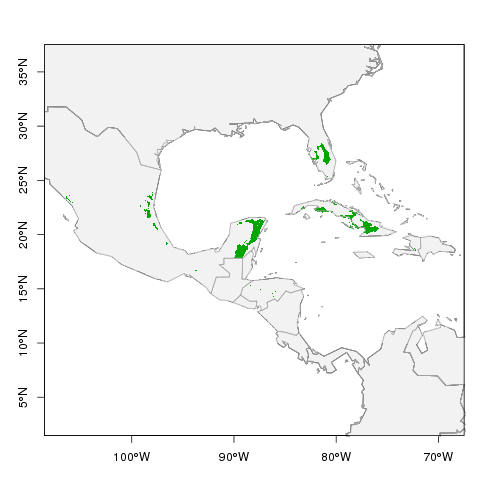

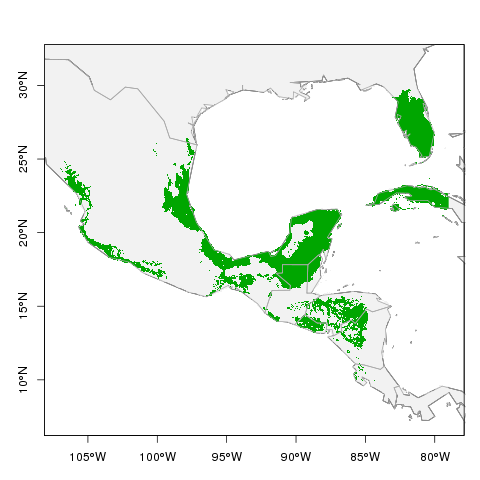

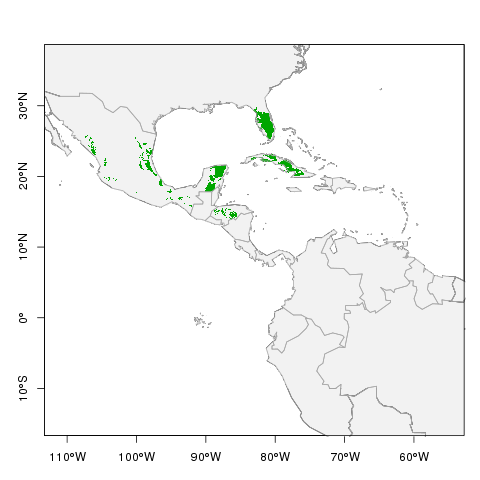

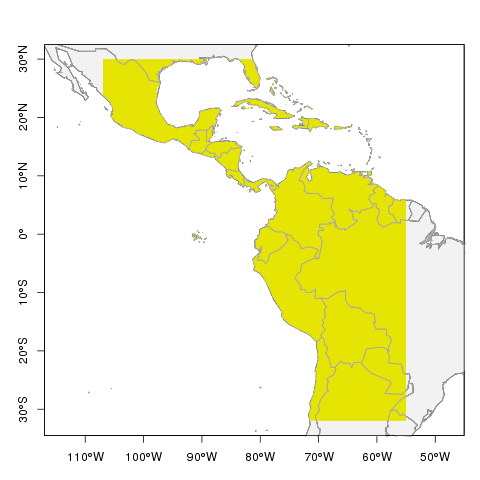

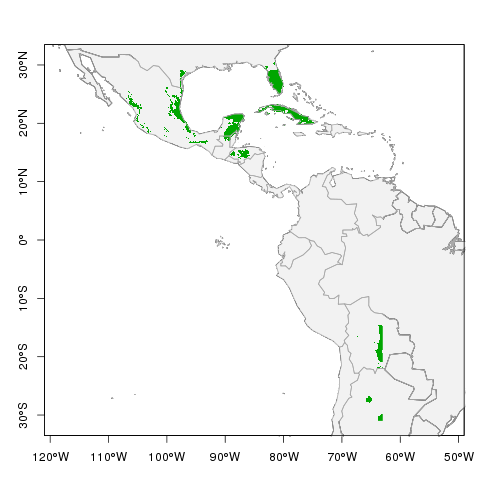

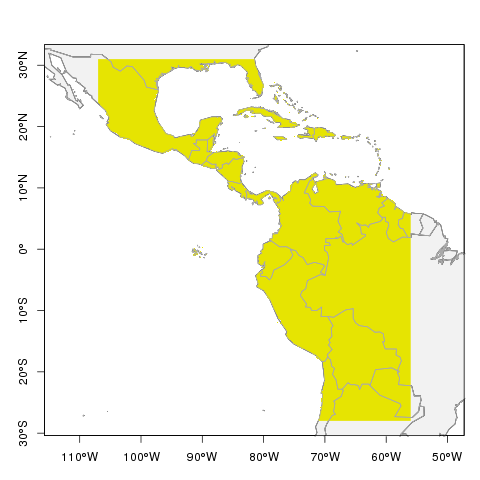

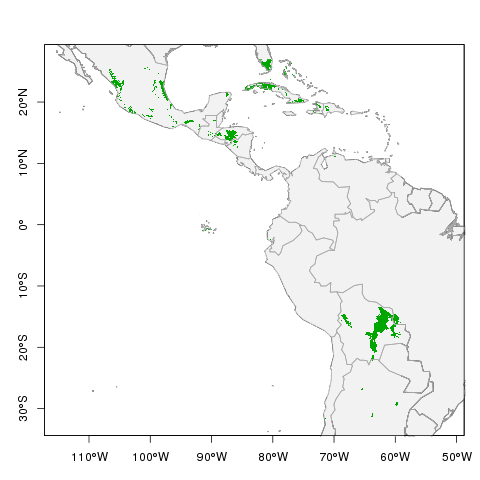

In [23]:
for name in species_name_list:
    if (name not in name_taxId_map):
        display(Markdown("# Error! unknown species name: " + name + "\n"))
        continue
    
    taxonId = name_taxId_map[name]
    
    display(Markdown("# " + name + "\n## Taxon ID: " + taxonId))
    
    images_dir = project_path + "output/images/" + taxonId + "/"
    images = !(ls $images_dir*.png | xargs -n 1 basename)
    
    if (len(images) <= 0):
        print("Insufficient number of observations to run SDM")
        continue
        
    for image in images:
        month = image.split("-")
        display(Image(images_dir + image))